# Finding the Scaling Relations 

* All the expressions are symbolically evaluated in the [model_generator.py](https://github.com/Rnazx/Scaling-Relations/blob/master/model_generator.py) file using the model_gen_regime function.

* The following are the steps needed to find the scaling relations. The instructions below are given in the order of the blocks of code.

* The model corresponding to each regime is described as follows

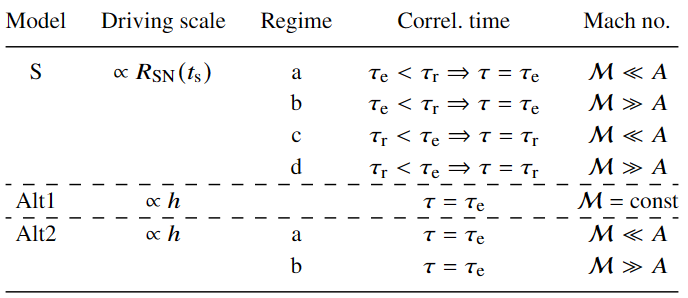


### Import dependencies

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from ipywidgets import interactive

### Define Symbols involved
We need these symbols to substitute the physical constants' values into the final expressions.

In [54]:
# Symbols for the observables
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mu0 = Symbol('Mu_0')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
psi = Symbol('psi')
kalpha = Symbol('K_alpha')
bet = Symbol('beta')
alphak = Symbol('alpha_k')
Gamma = Symbol('Gamma')
eta = Symbol('eta')
Nsb = Symbol('N_sb')

### Constants involved

* We first import all the physical constants from [constants.in](constants.in). 
* Then, we make a list of tuples which will then be substituted in the expression.

**Note:** These constants will not matter while finding the scaling relations. However, if we want the full expressions, the physical constants play a significant role

In [55]:
# conversion factors and physical constants used to convert all quantities to cgs units for consistency
g_Msun = 1.989e33  # solar mass in g
cgs_G = 6.674e-8  # gravitational constant in cgs units
g_mH = 1.6736e-24  # mass of hydrogen atom in grams
cgs_kB = 1.3807e-16  # boltzmann constant in cgs units
pc_kpc = 1e3  # number of pc in one kpc
cm_kpc = 3.086e+21  # number of centimeters in one parsec
cm_km = 1e5  # number of cm in one km
s_Myr = 1e+6*(365*24*60*60)  # number of seconds in one megayear


# Reading the Constant values
gval, clval, xioval, mstarval, deltaval, e51val, kaval, Gammaval, Caval, Rkval, muval, mu0val, etaval = tuple(
    np.genfromtxt('constants.in', delimiter='=', dtype=np.float64)[:, -1])

# List of tuples for substituting the values in the symbol. 
# The firt element of each tuple is the symbol for which the value needs to be substituted
# The second element is the numerical value which is stored in constants.in file
const = [(boltz, cgs_kB), (mh, g_mH), (G, cgs_G), (gamma, gval),
         (calpha, Caval), (Rk, Rkval), (mu, muval), (cl,
                                               clval), (xio, xioval), (mstar, mstarval*g_Msun),
         (delta, deltaval), (E51, e51val), (kalpha, kaval), (Gamma, Gammaval), (mu0, mu0val), (eta, etaval)]

### Choose the model

* Run this block to open an interactive window of a bunch of dropdowns.
* From this, you can choose the regimes for scale height h, correlation length l, velocity dispersion u, correlation time $\tau$ and $\alpha_k$


In [56]:
def myf(h, l, u, t, alpha):
    return h, l, u, t, alpha


y = interactive(myf, h=[r'subsonic', r'supersonic', r'cs/omega'],
                l=[r'maximum scale-driven', r'isolated supernovae-driven', r'superbubble-driven'],
                u=[r'sound speed', r'supenovae/superbubble-driven'],
                t=[r'eddy turnover time', r'supernovae/superbubble renovation time'],
                alpha=['regime 1', 'regime 2', 'regime 3'])#regime
y

interactive(children=(Dropdown(description='h', options=('subsonic', 'supersonic', 'cs/omega'), value='subsoni…

### Saving the regime information in variables
**Note:** If you wish to change the regime, just change it from the drop down box above and run the next line of code

In [57]:
hreg, lreg, ureg, taureg, alphareg = y.result

* The model_gen_regime() function from [model_generator.py](model_generator.py) takes in the regimes for the scale height h, correlation length l, velocity dispersion u, correlation time $\tau$ and $\alpha_k$ described in the manuscript. 
* This function is then used to find the expressions per regime chosen above

In [58]:
from model_generator import model_gen_regime
quantities = model_gen_regime(hreg, lreg, ureg, taureg, alphareg)

### Quantity for which the scaling relations are required
* Running the code-block below will open an interactive window of dropdowns.
* From these dropdowns select the quantity for which you wish to find the scaling relations

In [59]:
def myfunc(quantity):
    return quantity

quantity_string = ['h', 'l', 'u', 'tau',
                   'biso', 'bani', 'Bbar', 'tanpB']
quan_interact = interactive(myfunc, quantity=quantity_string)
quan_interact

interactive(children=(Dropdown(description='quantity', options=('h', 'l', 'u', 'tau', 'biso', 'bani', 'Bbar', …

**Note:** If you wish to change the quantity, just change it from the drop down box above and run the next line of code

### Displaying the full expression of the selected quantity

* Using the selected quantity we find the index.
* We use this index to display the full exression of the corresponding quantity obtained using the function in [model_generator.py](model_generator.py)

In [60]:
idx = quantity_string.index(quan_interact.result)
# quantity we are interested in
final_quantity = quantities[idx]
final_quantity


T*gamma*k_B/(3*pi*G*Sigma_tot*m_H*mu)

* Print the full expression in Latex
* We can use this in our Latex file

In [61]:
print_latex(final_quantity)

\frac{T \gamma k_{B}}{3 \pi G \Sigma_{tot} m_{H} \mu}


### Substituting arbitrary values in the full expression
**Note:** All values need to be in cgs units

In [62]:
# values subsituted for the observables. They are set to typical values observed in a galaxy
variables = [(sigmatot, 0.1), (sigma, 0.01), (sigmasfr, 1e-19),
                 (omega, 1e-15), (q, 1), (T, 1e+4), (Nsb, 1)]
# the final substituents are the physical constants and the observables
final = const + variables
final_quan_val = final_quantity.subs(final)
#store the quantity chosen
quantity_chosen = quantity_string[idx]
#printing the quantity in cgs units
print(f'The quantity {quantity_chosen} for the above given values is {float(final_quan_val)} in cgs units')

The quantity h for the above given values is 1.549094336036623e+19 in cgs units


### Find and plot the scaling relations

The scaling relation is 


T**1.0/Sigma_tot**1.0

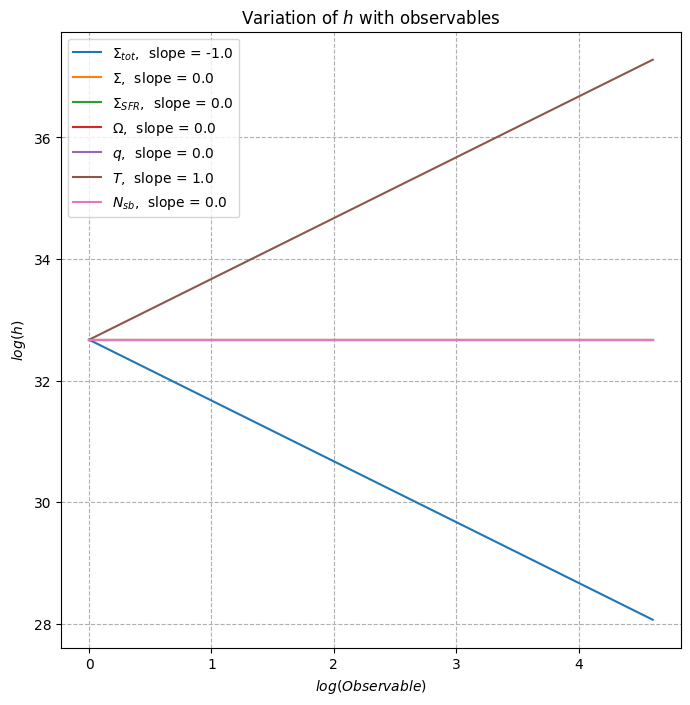

In [63]:
# observable to be varied
# You can tweak this list to include any observable you want
observables = [sigmatot, sigma, sigmasfr, 
                omega, q, T, Nsb]
#range of the observable to be varied while plotting
range_obs = np.linspace(1, 100, 100)
# plotting the scaling relations
plt.figure(figsize=(8, 8))
relation = 1
#for each observable plot the scaling realtion
for obs in observables:
    #We substitute 1 for each observable
    observable_subs = [(o, 1) for o in observables]
    #remove the observables we are interested in from the above list
    observable_subs.remove((obs, 1))
    values_substituted = const + observable_subs
    #substitute the rest of the quantities in the full expression along with the physical constants
    quan_obs_dependence = final_quantity.subs(values_substituted)
    #vary obs for the particular observable in the loop which is plotted later on
    quan_varied_obs = np.array(np.float64([quan_obs_dependence.evalf(subs={obs: obs_val}) for obs_val in range_obs]))
    # if the quantity is tanpB then we need to get rid of the minus sign before plotting
    if idx == 7:
        quan_varied_obs = np.abs(quan_varied_obs)
    # exponent of the observable rounded off to three decimal places
    power_obs = np.round(np.float64((diff(log(quan_obs_dependence), obs)*obs).subs(obs, 1)), 3)
    # Used for printing the scaling realtion
    relation *= np.power(obs, power_obs)
    plt.plot(np.log(range_obs), np.log(quan_varied_obs), label='$' +
             str(latex(obs))+'$,  slope = '+str(power_obs))
plt.title('Variation of $'+quantity_chosen+'$ with observables')
plt.xlabel('$log(Observable)$')
plt.ylabel('$log('+quantity_chosen+')$')
plt.grid(True, which="both", ls="--")
plt.legend()

print('The scaling relation is ')
relation

* We can then save this file using the save option in jupyter notebook.